In [5]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pylab
from pylab import rcParams

#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 8)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 90)

data_path = '../../data/Prod data.xlsx'
fc_path = '../../data/fc.xlsx'
#df = pd.read_excel(data_path, index_col=1)  # в качестве индекса используется столбец скважин
df = pd.read_excel(data_path)  # в качестве индекса используется столбец скважин
#df[:5]

### Создание датафреймов из прогнозных данных ВДО

In [6]:
# X:\MOSCOW\03-WDO\01_All Areas\03 Projects\20 RE\Business plans from WDO\2020.03.25 pdf\Добыча 2020 факт+план.pdf
fc_wdo_20200325 = pd.read_excel(fc_path, sheet_name='WDO_2020.03.25')
fc_wdo_20200325

# X:\MOSCOW\03-WDO\01_All Areas\03 Projects\20 RE\Business plans from WDO\2020.04.10 fc 2020+\Добыча по месторождениям_апрель 2020.xls
fc_wdo_20200410 = pd.read_excel(fc_path, sheet_name='WDO_2020.04.10')
fc_wdo_20200410

fc_wdr_20200403 = pd.read_excel(fc_path, sheet_name='WDR_2020.04.03')
fc_wdr_20200403

,year,wdo,pam-sas,prib,nemir,vysots,avil,dob,n-dob,zapo,molod,losin,lesnoe,zaliv
0,2020,324.129410,155.410381,19.960672,4.320000,0.811000,56.197215,25.278644,26.858838,17.033000,10.551709,3.79014,3.499811,0.418
1,2021,254.482574,119.030215,13.669504,3.300000,0.450000,50.797655,19.500360,18.383718,11.240146,12.243741,3.35994,2.507294,NaN
2,2022,165.047529,75.151428,6.577582,2.500000,0.280000,35.102100,13.529964,9.860238,7.667086,9.737048,2.57154,2.070543,NaN
3,2023,89.689338,35.360633,2.006234,1.891666,0.150000,20.785492,10.353509,3.207712,5.056725,7.274979,1.78314,1.819248,NaN
4,2024,36.418003,8.273937,0.361454,1.359067,0.067133,7.143423,7.957352,0.506160,3.227869,4.863700,0.99828,1.659627,NaN
5,2025,15.781555,2.074269,NaN,0.976422,NaN,0.633416,5.824805,NaN,2.056380,2.448339,0.21552,1.552405,NaN
6,2026,6.293824,NaN,NaN,0.701510,NaN,NaN,2.829302,NaN,1.013300,0.286086,NaN,1.463626,NaN
7,2027,1.147897,NaN,NaN,0.504000,NaN,NaN,NaN,NaN,0.643897,NaN,NaN,NaN,NaN
8,2028,0.409162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.409162,NaN,NaN,NaN,NaN
9,2029,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260000,NaN,NaN,NaN,NaN


### Построение графиков прогнозных данных

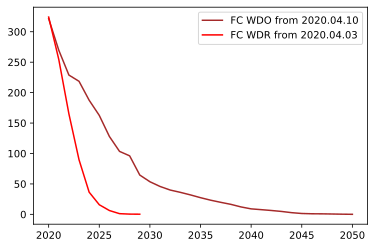

In [7]:
t1 = fc_wdo_20200410['year']  # well_name = 'Plat-2'
data1 = fc_wdo_20200410['wdo']
t2 = fc_wdr_20200403['year']
data2 = fc_wdr_20200403['wdo']

plt.plot(t1, data1, label='FC WDO from 2020.04.10', color="brown")
plt.plot(t2, data2, label='FC WDR from 2020.04.03', color="red")

rcParams['figure.figsize'] = 12, 6

#plt.axis(['2010-01-01', '2024-01-01', 1, 300])
#plt.title(well_name)
#plt.setp( , color="black")
plt.legend()
plt.show()

In [8]:
fc_wdo_20200410['wdo'].sum().round(1), fc_wdr_20200403['wdo'].sum().round(1)

(2122.1, 893.7)

### Построение таблиц сравнения прогнозов

In [9]:
merged_fc = pd.concat([fc_wdo_20200410['year'], fc_wdo_20200410['wdo'].round(1), fc_wdr_20200403['wdo'].round(1)],\
                      axis=1, sort=False)
merged_fc.columns = ['year', 'wdo 2020.04.10', 'wdr 2020.04.03']
merged_fc.append(pd.Series(merged_fc.sum(),name='Total')) 
#merged_fc

,year,wdo 2020.04.10,wdr 2020.04.03
0,2020.0,321.5,324.1
1,2021.0,269.7,254.5
2,2022.0,228.8,165.0
3,2023.0,218.6,89.7
4,2024.0,187.5,36.4
5,2025.0,162.5,15.8
6,2026.0,127.9,6.3
7,2027.0,103.4,1.1
8,2028.0,96.1,0.4
9,2029.0,64.6,0.3


### Извлечение из таблицы последнего исторического дебита

In [10]:
well_name = 'Plat-2'
last_hist_date = '2020-03-01'

# извлечение строчки по скважине на заданную дату
#df[(df['Well'] == well_name) & (df['Date'] == last_hist_date)]

# извлечение месячной добычи по скважине на нужную дату (послдней исторической)
#df['Oil production (actual), t'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)]

# месячная добыча / кол-во часов работы * 24 = среднесуточный дебит
last_hist_rate = df['Oil production (actual), t'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] \
/ df['Working hours'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] * 24

# преобразование объекта series в число
last_hist_rate = last_hist_rate.item()

### Создание кривой падения добычи (по Арпсу)

In [11]:
qi = last_hist_rate       # начальный дебит = последнему историческому
d = 0.05                  # коэффициент Арпса
q_elim = 3                # экономический предел остановки скважины
s_date_fc = '2020-04-01'  # начальная дата прогноза
# =================================================================================
q_fc = []
month_no = 1  # начинаем считать месяцы с первого (с нулевого если дебит 1-го мес-ца как посл-ий истор-ий)
#q = qi        # 
while qi * math.exp(-month_no * d) > q_elim:
    q = qi * math.exp(-month_no * d)
    q_fc.append(q)
    month_no += 1
# q_fc # массив дебитов (прогнозных)

# генерация массива дат для прогноза
dates_fc = pd.date_range(start = s_date_fc, periods=len(q_fc), freq='MS')

# объединение прогнозных дебитов и массива дат как индекса в объекте Series
q_fc_series = pd.Series(q_fc, index=dates_fc)
#q_fc_series.plot() # построение графика добычи

### Отрисовка исторических данных с прогнозом

No handles with labels found to put in legend.


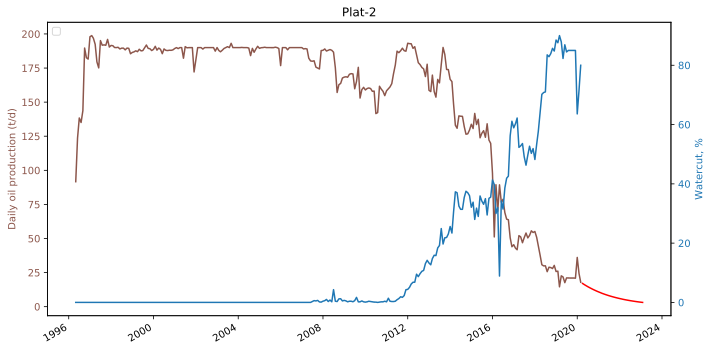

In [12]:
#t = df['Date']  # well_name = 'Plat-2'
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
data2 = df['WCT, %'].where(df['Well'] == well_name)
data3 = df['Gas production, M m3'].where(df['Well'] == well_name) / df['Working hours'] * 24

fig, ax1 = plt.subplots(figsize = (10, 5))

color = 'tab:brown'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Daily oil production (t/d)', color=color)
ax1.plot(df['Date'], data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# кривая прогноза
q_fc_series.plot(color="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Watercut, %', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Date'], data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)


legend = plt.legend(loc='upper left')
plt.setp(legend.get_texts(), color="black")

plt.title(well_name)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend()
plt.show()

Создание словаря параметров скважин

In [98]:
well_dict = {'Plat-2':  {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-5':  {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-6':  {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-8':  {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-13': {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-15': {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-3':  {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-11': {'d': 0.04, 'field': 'Pam-Sas'},
          'Plat-12': {'d': 0.04, 'field': 'Pam-Sas'}
         }
print(well_dict['Plat-2']['d'])
print(well_dict['Plat-5']['field'])
print(well_dict['Plat-5']['d'],d_dict['Plat-5']['field'])
print('====')
for well, well_info in well_dict.items():
    print(well, ': ', end='')
    
    for param in well_info:
        print(param + ':', well_info[param])
    print('---')

0.04
Pam-Sas
0.04 Pam-Sas
====
Plat-2 : d: 0.04
field: Pam-Sas
---
Plat-5 : d: 0.04
field: Pam-Sas
---
Plat-6 : d: 0.04
field: Pam-Sas
---
Plat-8 : d: 0.04
field: Pam-Sas
---
Plat-13 : d: 0.04
field: Pam-Sas
---
Plat-15 : d: 0.04
field: Pam-Sas
---
Plat-3 : d: 0.04
field: Pam-Sas
---
Plat-11 : d: 0.04
field: Pam-Sas
---
Plat-12 : d: 0.04
field: Pam-Sas
---


### Построение кривой падения добычи в логарифмическом масштабе

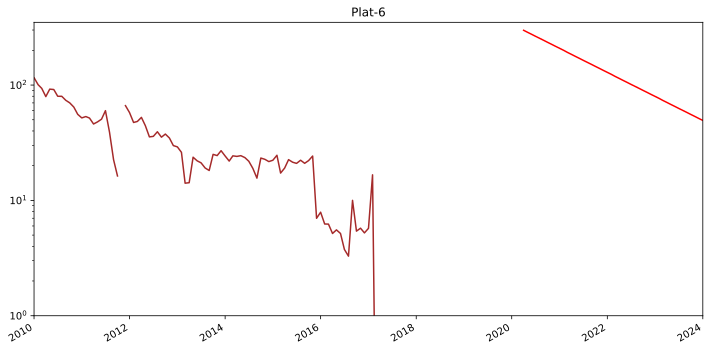

310.7096774193548


,2020-04-01,2020-05-01,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,...,2028-01-01,2028-02-01,2028-03-01,2028-04-01,2028-05-01,2028-06-01,2028-07-01,2028-08-01,2028-09-01,2028-10-01
0,298.5,286.8,275.6,264.8,254.4,244.4,234.8,225.6,216.8,208.3,...,7.2,7.0,6.7,6.4,6.2,5.9,5.7,5.5,5.3,5.0


In [110]:
# Получение посл-го истор-го дебита = месячная добыча / кол-во часов работы * 24 = среднесуточный дебит
last_hist_rate = df['Oil production (actual), t'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] \
/ df['Working hours'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] * 24

# преобразование объекта series в число
last_hist_rate = last_hist_rate.item()

well_name = 'Plat-6'
qi = last_hist_rate       # начальный дебит = последнему историческому
d = 0.04                  # коэффициент Арпса
q_elim = 5                # экономический предел остановки скважины
s_date_fc = '2020-04-01'  # начальная дата прогноза
# =================================================================================
q_fc = []
month_no = 1  # начинаем считать месяцы с первого (с нулевого если дебит 1-го мес-ца как посл-ий истор-ий)
#q = qi        # 
while qi * math.exp(-month_no * d) > q_elim:
    q = qi * math.exp(-month_no * d)
    q_fc.append(q)
    month_no += 1
# q_fc # массив дебитов (прогнозных)

dates_fc = pd.date_range(start = s_date_fc, periods=len(q_fc), freq='MS') # генерация массива дат для прогноза
q_fc_series = pd.Series(q_fc, index=dates_fc) # объединение прогнозных дебитов и массива дат как индекса в объекте Series
rcParams['figure.figsize'] = 12, 6
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
plt.plot(df['Date'], data1, color="brown")
# кривая прогноза
q_fc_series.plot(color="red")
plt.yscale(value="log")
plt.axis(['2010-01-01', '2024-01-01', 1, 350])
plt.title(well_name)
plt.show()
print(last_hist_rate)
pd.DataFrame(q_fc_series.round(1), dates_fc).T

Подбор коэффициетов для прогноза

(733650, 738760)

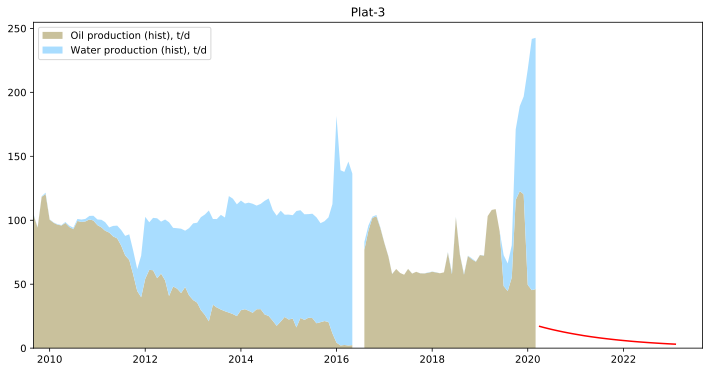

In [45]:
well_name = 'Plat-3'
qi = last_hist_rate       # начальный дебит = последнему историческому
d = 0.05                  # коэффициент Арпса
q_elim = 3                # экономический предел остановки скважины
s_date_fc = '2020-04-01'  # начальная дата прогноза
# =================================================================================
q_fc = []
month_no = 1  # начинаем считать месяцы с первого (с нулевого если дебит 1-го мес-ца как посл-ий истор-ий)
#q = qi        # 
while qi * math.exp(-month_no * d) > q_elim:
    q = qi * math.exp(-month_no * d)
    q_fc.append(q)
    month_no += 1
# q_fc # массив дебитов (прогнозных)

# генерация массива дат для прогноза
dates_fc = pd.date_range(start = s_date_fc, periods=len(q_fc), freq='MS')

# объединение прогнозных дебитов и массива дат как индекса в объекте Series
q_fc_series = pd.Series(q_fc, index=dates_fc)


x = df['Date']
y1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
y2 = df['Water production, t'].where(df['Well'] == well_name) / df['Working hours'] * 24
#y3 = ...


colors = ['#C9C19C', '#A9DDFF']
plt.stackplot(x, y1, y2, labels=['Oil production (hist), t/d','Water production (hist), t/d'], colors=colors)
plt.plot(dates_fc, q_fc_series, color="red")
plt.legend(loc='upper left')
plt.title(well_name)
plt.xlim(2010*365, 2024*365)  # нумерация в днях

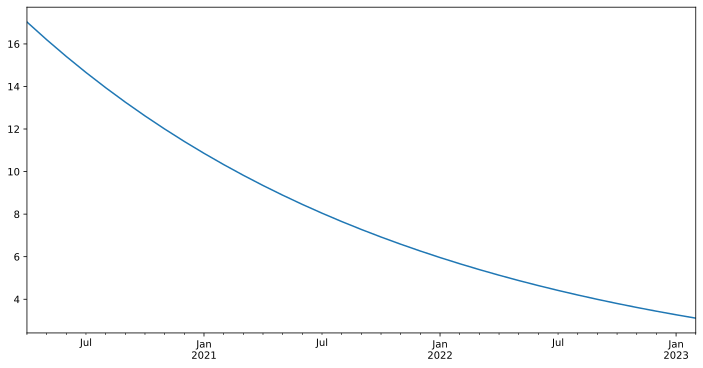

In [14]:
#            init_rate  d workover_date workover_rate workover_d
well_dict = {
    'plat-15': {
        'init_rate': 19.4,
                'd': 0.05,
    'workover_date': '2020-08-01',
    'workover_rate': 45,
       'workover_d': 0.05}
}



qi = last_hist_rate       # начальный дебит = последнему историческому
d = 0.05                  # коэффициент Арпса
q_elim = 3                # экономический предел остановки скважины
s_date_fc = '2020-04-01'  # начальная дата прогноза
# =================================================================================
q_fc = []
month_no = 1  # начинаем считать месяцы с первого (с нулевого если дебит 1-го мес-ца как посл-ий истор-ий)
#q = qi        # 
while qi * math.exp(-month_no * d) > q_elim:
    q = qi * math.exp(-month_no * d)
    q_fc.append(q)
    month_no += 1
# q_fc # массив дебитов (прогнозных)

# генерация массива дат для прогноза
dates_fc = pd.date_range(start = s_date_fc, periods=len(q_fc), freq='MS')

# объединение прогнозных дебитов и массива дат как индекса в объекте Series
q_fc_series = pd.Series(q_fc, index=dates_fc)
q_fc_series.plot() # построение графика добычи

# Backup

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

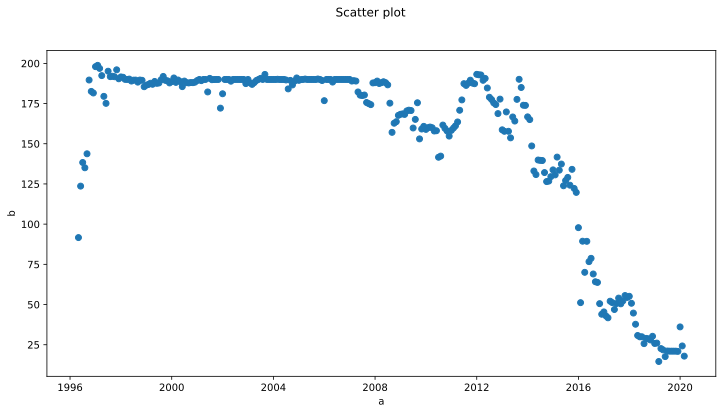

In [15]:
plt.figure();
plt.suptitle('Scatter plot')
plt.xlabel('a')
plt.ylabel('b')
plt.scatter(df['Date'], data1)

z = np.polyfit(df['Date'].values.flatten(), data1.values.flatten(), 1)
p = np.poly1d(z)
plt.plot(data1,p(data1),"r--")
plt.title("y=%.6fx+%.6f"%(z[0],z[1])) 

plt.show()

In [ ]:
well_name = 'Plat-2'

plt.figure(figsize = (12, 6))
plt.scatter(df['Date'],
           (df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24))
plt.scatter(df['Date'], df['WCT, %'].where(df['Well'] == well_name))
plt.scatter(df['Date'], q_fc)
plt.title('Daily oil production (t/d)')
plt.ylabel('Daily oil production (t/d)')
plt.title(well_name)
plt.show()

In [ ]:
plt.plot(['2010-01-01'] * 100, np.linspace(0, 100, 100), label='median', linestyle='--', linewidth=4)
plt.show()

In [ ]:
#df.dtypes  # типы данных
# Приведение данных к типу данных float
# df['Oil production (actual), t'] = df['Oil production (actual), t'].astype('float')
# df['Working hours'] = df['Working hours'].astype('float')

In [ ]:
df['Date']
well_name = 'Plat-2'
(df['Oil production (actual), t'].where(df['Well'] == well_name)  / df['Working hours'] * 24)[:1] , df['Date']

In [ ]:
df['Date']
well_name = 'Plat-2'
(df['Oil production (actual), t'].where(df['Well'] == well_name)  / df['Working hours'] * 24).tail(5)

In [ ]:
t = df['Date']
well_name = 'Plat-2'
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
data2 = df['WCT, %'].where(df['Well'] == well_name)
data3 = df['Gas production, M m3'].where(df['Well'] == well_name) / df['Working hours'] * 24

fig, ax1 = plt.subplots(figsize = (10, 5))

color = 'tab:brown'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Daily oil production (t/d)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Watercut, %', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax1.plot(t, data3, color=color)

legend = plt.legend(loc='upper left')
plt.setp(legend.get_texts(), color="black")

plt.title(well_name)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend()
plt.show()